In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import numpy as np

In [235]:
def gen_table():
    table = pd.DataFrame(columns=['Algorithm', 'Improvement', 'Std', 'Size', 'Noise'])
    for i, file in enumerate(listdir('final_results/')):
        df = pd.read_csv('final_results/'+file, names=['iteration', 'timestamp','fitness','dataset','matrix','algo'])
        starts = df.groupby('matrix').first()['fitness']
        ends = df.groupby('matrix').last()['fitness']
        x = (starts-ends)/starts*100
        table.loc[i] = [file.split('_')[1][4], x.mean(), x.std(), int(file.split('_')[3][1:]), int(file.split('_')[4][3:5])]
    return table.sort_values(by=['Size', 'Noise', 'Algorithm'])

In [236]:
gen_table()

,Algorithm,Improvement,Std,Size,Noise
9,1,6.536004,4.138008,10,10
2,2,6.899848,4.280429,10,10
4,3,2.047386,2.035970,10,10
5,1,6.567951,5.567823,10,25
13,2,6.386221,5.703990,10,25
11,3,1.476426,2.928969,10,25
10,1,10.297760,8.912345,10,50
7,2,10.087358,8.852070,10,50
15,3,2.815522,3.671283,10,50
0,1,28.091927,8.421150,20,10


In [243]:
# Plot Algorithm improvement by noise in each of the possible matrix sizes
def plot1():
    results = gen_table()
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122, sharey=ax1)
    pd.pivot_table(results.loc[results.Size==10], values='Improvement', index='Algorithm', columns='Noise').plot(ax=ax1, marker='s', title='Matrix Size 10')
    pd.pivot_table(results.loc[results.Size==20], values='Improvement', index='Algorithm', columns='Noise').plot(ax=ax2, marker='s', title='Matrix Size 20')
    ax1.set_ylabel('Improvement %')
    plt.show()
    

In [244]:
# Plot Algorithm improvement by Matrix Size in each of the possible Noises
def plot2():
    results = gen_table()
    ax1 = plt.subplot(131)
    ax2 = plt.subplot(132, sharey=ax1)
    ax3 = plt.subplot(133, sharey=ax2)
    
    pd.pivot_table(results.loc[results.Noise==10], values='Improvement', index='Size', columns='Algorithm').plot(ax=ax1, marker='s', title='Noise 10')
    pd.pivot_table(results.loc[results.Noise==25], values='Improvement', index='Size', columns='Algorithm').plot(ax=ax2, marker='s', title='Noise 25')
    pd.pivot_table(results.loc[results.Noise==50], values='Improvement', index='Size', columns='Algorithm').plot(ax=ax3, marker='s', title='Noise 50')
    ax1.set_ylabel('Improvement %')
    plt.show()
    

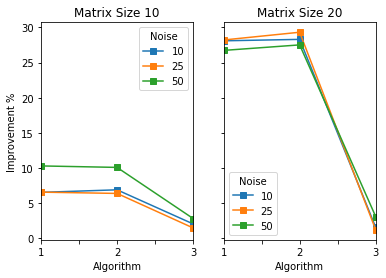

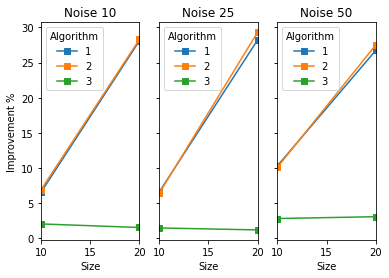

In [245]:
plot1()
plot2()